# <p style="text-align: right;"> &#9989; Group members: Expery, Dan, Tommy, Kevin</p>


### Statement of the problem

> This project is intended to model and predict the spread of COVID-19 throughout the world. This problem is interesting to us because of the relevancy of this disease. We wanted to find out how well we could model the infection, recovery, and death rates in comparison to the actual number of cases. This problem comes with many challenges, and can be approached in many different ways. With this in mind, we thought it would be useful to include multiple methods of modeling the data. This problem is important because of the impact this virus has had on our daily lives, schoolwork, and social capabilities.

### Data we will use

> The data we used for this project came from a Johns Hopkins University resource that tracked the COVID-19 figures of infection rates, recovery rates, death rates, and confirmed cases over time for every country in the world. This dataset was useful because of the amount of information over many days and was large enough to run statistical models. The data accounts for January 22nd through the most recent data.

### What kind of model? 

> We developed a class that was capable of calling on various modeling types. Included in this class were modules for Polyfit, SVM, and Linear Regression modeling techniques. We initially decided on an SVM-only model, but later included Linear Regression and Polyfit for comparison. Polyfit fit the data with the highest accuracy while Linear Regression was not very useful in accurately depicting the data.

In [1]:
#Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import random
import time
from sklearn.svm import SVR
import operator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# plt.style.use('seaborn')
%matplotlib inline

In [2]:
"""Loads the most recent data updated in the John Hopkins covid-19 page"""

cases = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")
recovered = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv")
deaths = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv")

In [3]:
dates = cases.keys()[4:] #grabs the dates from the column headers of the dataset for the xaxis of graphs

In [4]:
#Visualization of the data
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19


In [5]:
#Visualization of the data
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18,29,32,32,32,32,32,40,43,54
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,131,154,165,182,197,217,232,248,251,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,113,237,347,405,460,591,601,691,708,783
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,52,58,71,71,128,128,128,169,169
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,4,4,4,5,5,5


In [6]:
#Visualization of the data
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14,14,15,15,18,18,21,23,25,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,22,22,23,23,23,23,23,24,25,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,193,205,235,256,275,293,313,326,336,348
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,22,23,25,26,26,29,29,31,33,33
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [7]:
"""This function returns the worldwide total number of covid-19 cases, deaths or recovered per day"""

def total_per_day(dates, data):
        return np.array([sum(data[date]) for date in dates]).reshape(-1, 1)

In [8]:
# Prepare Data
X = np.array(list(range(len(dates)))).reshape(-1, 1)
y = total_per_day(dates, cases)

In [9]:
"""These two functions computes the sum of cases in every country with covid-19 cases 
and returns them in a dictionary"""

def get_total(data):
    # Dict key = country, value = sum of all data for that country
    data_dict = {}
    for i, row in data[:].iterrows():
        
        if row[1] in data_dict:
            data_dict[row[1]] += row[-1]
        else: data_dict[row[1]] = row[-1]
         
    return data_dict

def combine_related(list_dicts):
    unique_countries = list_dicts[0].keys()
    result = {}
    for country in unique_countries:
        result[country] = []
        for dict_ in list_dicts:
            result[country].append(dict_[country])
            
    return result


In [10]:
"""For organization's sake, all 3 dataframes are combined to show totals in confirmed,
recovered, and mortality for all countries"""

Country_total_cases = get_total(cases)
country_total_recovered = get_total(recovered)
country_total_deaths = get_total(deaths)


Country_total = combine_related([Country_total_cases, country_total_recovered, country_total_deaths])
CT = list(Country_total.items())
CT.sort(key=lambda x: x[1][0], reverse=True)  #Sorting table by number of cases


countries_ = [tpl[0] for tpl in CT]
cases_ = [tpl[1][0] for tpl in CT]
recovered_ = [tpl[1][1] for tpl in CT]
deaths_ = [tpl[1][2] for tpl in CT]

#Creates a Pandas DF
print("Most Recent Covid-19 Data Worldwide")
df = pd.DataFrame({'Countries': countries_, 'Cases': cases_, "Recovered":recovered_,"Deaths":deaths_}) 
pd.set_option('display.max_rows', None)
df.set_index('Countries', inplace = True)
df

Most Recent Covid-19 Data Worldwide


,Cases,Recovered,Deaths
Countries,,,
US,667801,54703,32916
Spain,184948,74797,19315
Italy,168941,40164,22170
France,147091,33327,17941
Germany,137698,77000,4052
United Kingdom,104145,375,13759
China,83403,78401,3346
Iran,77995,52229,4869
Turkey,74193,7089,1643


In [11]:
""" 
CovidAnalyzer class takes in the data (cases, death or recovered)downloaded from John Hopkins page and 
prepared and extracts the dates and # of cases/death/recovered. The class then splits it into training 
and testing and uses two models, SVM and Linear regression to train the data. The two models are then 
used to predict both the testing data and the whole dataset from January - Current date + 10 more days.
"""

class CovidAnalyzer():
    def __init__(self):
        self.X = []  #all parameters are set by the different methods below
        self.y = []
        
        self.X_train = []
        self.X_test = []
        self.y_train = []
        self.y_test = []
        
        self.svm_pred = []
        self.linear_pred = []
        
        self.forecast = []
        
    def set_forecast(self, num=5): #adds a specified number of days to the data that will be given a predicted y-val.
        self.forecast = np.array(list(range(len(self.X) + num))).reshape(-1, 1) 
        
    def set_data(self,X, y):
        self.X = X #sets x and y data
        self.y = y
        
    def prepare(self):  
        #splits data for test and train
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split( 
        self.X, self.y, test_size=0.2, shuffle=False)
        self.forecast = np.array(list(range(len(self.X) + 10))).reshape(-1, 1) #initally sets predicted days to next 10 days
        
    def polyfit(self, title = 'Confirmed Cases'):
        
        p = np.poly1d(np.polyfit(self.X.reshape(-1), self.y.reshape(-1), 4)) #polyfit function(gets function 
        t = np.linspace(0, len(self.forecast), 1000)                         # to a certain power + a,b,c vals)
        plt.figure(figsize=(30, 10))
        plt.ylabel("Population (1x10^6)", fontsize=25) #basic graph labels
        plt.xlabel("Days", fontsize=25)
        plt.title(title, fontsize=30)
        plt.plot(self.X, self.y, 'ko', label = 'polyfit actual') #plots actual x and y data as black dots
        plt.plot(t, p(t), "-", label = 'polyfit predict') #plots best fit(polyfit) as dashes
        #plots linear regression prediction and SVM prediction
        plt.plot(self.forecast, self.linear_pred, color='red', linewidth=2, label = 'LinearRegression')
        plt.plot(self.forecast, self.svm_pred, color='green', linewidth=2, label = 'SVM')
        #adds dates based on 10 day extension
        extend_dates = list(dates)
        extend_dates.extend(['4/17/20','4/18/20','4/19/20','4/20/20'
                ,'4/21/20','4/22/20','4/23/20','4/24/20','4/25/20','4/26/20'])
        #changes original x ticks to dates
        plt.xticks(ticks = range(0,len(extend_dates)) ,labels = extend_dates, rotation =90, fontsize = 20)
        plt.yticks(fontsize = 20)
        #formats y data in scientific notation (1x10^6)
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        plt.grid()
        plt.legend(fontsize=25)
        plt.show()
        
    def svm(self, title = 'Confirmed SVM'):
        # Building an SVM Model
        kernel = ['poly', 'sigmoid', 'rbf']
        c = [0.01, 0.1, 1, 10]
        gamma = [0.05, 0.5, 5] #prediction parameters
        epsilon = [0.01, 0.1, 1]
        shrinking = [True, False]
        svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon':epsilon, 'shrinking': shrinking}

        svm = SVR()
        #randomly selects and tests parameters
        svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv =3, return_train_score = True, n_jobs = -1, n_iter = 10, verbose = 1)
        svm_search.fit(self.X_train, self.y_train.ravel())
        
        print("Search Params: ", svm_search.best_params_)
        svm_confirmed = svm_search.best_estimator_
        #best estimates for graphing
        svm_pred = svm_confirmed.predict(self.X_test).reshape(-1)
        
        df = pd.DataFrame({'Actual': self.y_test.flatten(), 'Predicted': svm_pred.flatten()})
        print(df)
        
        
        # Check against testing data
        plt.figure(figsize=(30, 10))
        plt.scatter(self.X_test, self.y_test)
        plt.plot(self.X_test, svm_pred, color = 'red')
        plt.ylabel('Test Population', fontsize=25)  #plotting
        plt.xlabel("Test Days", fontsize=25)
        plt.title(title, fontsize=30)
        plt.xticks(fontsize = 20) 
        plt.yticks(fontsize = 20)
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        plt.grid()
        plt.show()
        
        print('MAE', mean_absolute_error(svm_pred, self.y_test)) #error calculations
        print('MSE', mean_squared_error(svm_pred, self.y_test))
        
        self.svm_pred = svm_confirmed.predict(self.forecast).reshape(-1)
        
    def linearReg(self, title = 'Confirmed Linear Regression'):
        
        regressor = LinearRegression()  
        regressor.fit(self.X_train, self.y_train) #training the algorithm
        
        #To retrieve the intercept:
        print("Y-Intercept: ",regressor.intercept_)
        #For retrieving the slope:
        print("Slope: ",regressor.coef_)
        
        y_pred = regressor.predict(self.X_test).reshape(-1)
        df = pd.DataFrame({'Actual': self.y_test.flatten(), 'Predicted': y_pred.flatten()})
        print(df)
        
        plt.figure(figsize=(30, 10))
        plt.scatter(self.X_test, self.y_test,  color='gray')
        plt.plot(self.X_test, y_pred, color='red')
        plt.ylabel('Test Population', fontsize=25) 
        plt.xlabel("Test Days", fontsize=25)
        plt.title(title, fontsize=30)
        plt.xticks(fontsize = 20) 
        plt.yticks(fontsize = 20)
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        plt.grid()
        plt.show()
        
        print('Mean Absolute Error:', metrics.mean_absolute_error(self.y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(self.y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(self.y_test, y_pred)))
        
        self.linear_pred = regressor.predict(self.forecast).reshape(-1)
        

In [12]:
covid_analyzer = CovidAnalyzer() #the class is used to set the data and prepare it
covid_analyzer.set_data(X, y)
covid_analyzer.prepare()

In [13]:
# Set forecast
covid_analyzer.set_forecast(10) #the next 10 days will be predicted

### Testing the model

> We attempted to test the models using accuracy scores. However, regression models are not compatible with accuracy scores, so we had to compare the models visually. The hardest thing was to find parameters that fit the actual data set in the SVM model. We evaluated our data visually with graphs that compared the machine learning algorythms to the actual data.

### Results

>The models each behaved in different ways. While polyfit had the most accurate curve, it was not influenced by machine learning. We believe that our results from SVM were the most applicable, while Linear Regression did not have an accurate depiction of the dataset and trendline. For SVM, the parameters of c, gamma, and epsilon had to be manually changed until we found numbers that positively influenced the machine learning. The Linear Regression model was generally insufficient for depicting the data. The polyfit function was useful in visualizing the curve of the data, but was not a function built by us. We attempted to use accuracy scores to compare the various models, but the accuracy scores could not be computed for regression models, so we decided to leave them out and compare the graphs visually.

### Confirmed Cases

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.2s finished


Search Params:  {'shrinking': False, 'kernel': 'poly', 'gamma': 0.5, 'epsilon': 1, 'C': 1}
     Actual      Predicted
0    782389  459168.022163
1    857487  479057.481010
2    932605  499531.882361
3   1013466  520599.703666
4   1095917  542269.422355
5   1176060  564549.515861
6   1249754  587448.461600
7   1321481  610974.737022
8   1395194  635136.819526
9   1480202  659943.186545
10  1563935  685402.315513
11  1657526  711522.683890
12  1735650  738312.769050
13  1834721  765781.048438
14  1904838  793935.999503
15  1976191  822786.099631
16  2056054  852339.826316
17  2152646  882605.656943


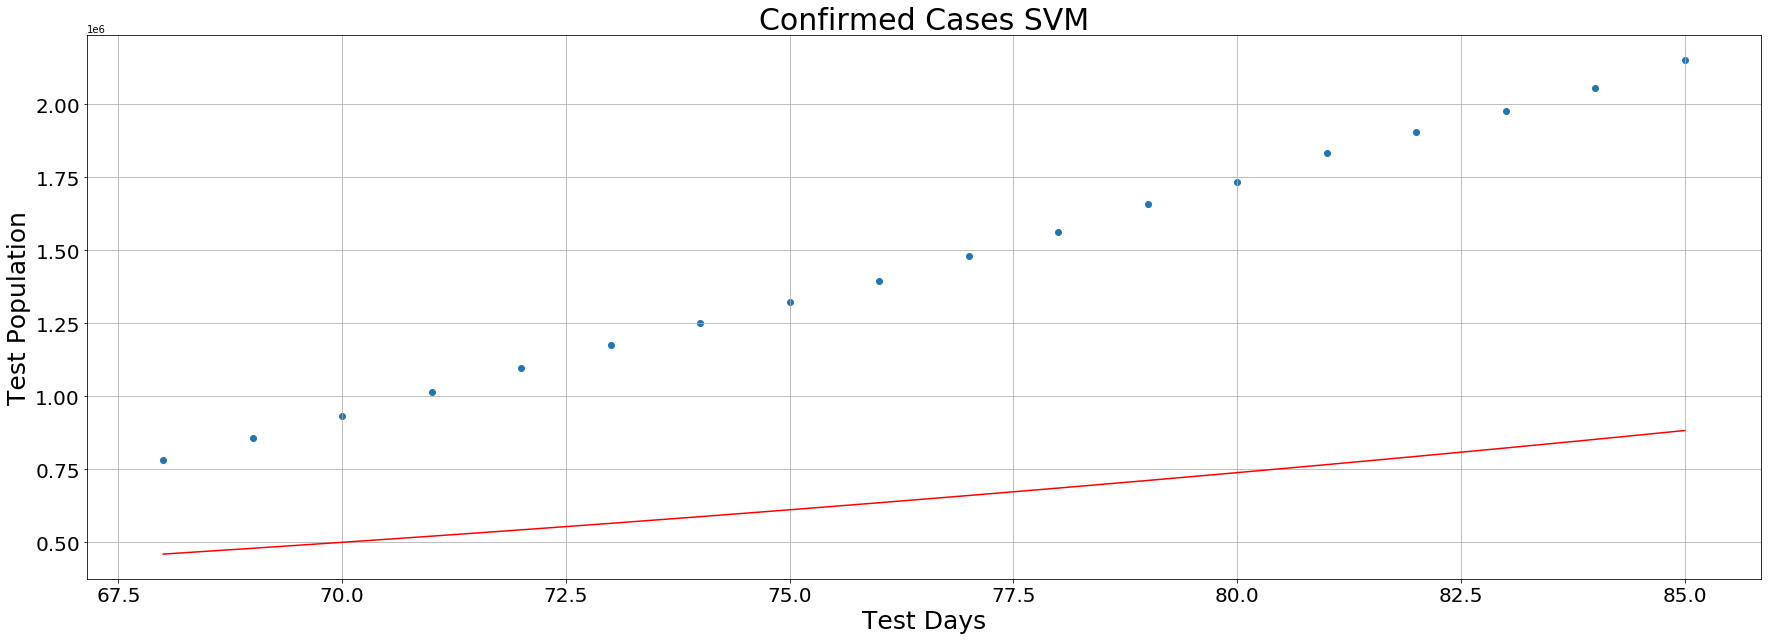

MAE 798597.2427004015
MSE 721279592642.2903


In [14]:
#SVM
covid_analyzer.svm(title = 'Confirmed Cases SVM')

Y-Intercept:  [-85836.76470588]
Slope:  [[6497.70807726]]
     Actual      Predicted
0    782389  356007.384548
1    857487  362505.092625
2    932605  369002.800702
3   1013466  375500.508780
4   1095917  381998.216857
5   1176060  388495.924934
6   1249754  394993.633011
7   1321481  401491.341089
8   1395194  407989.049166
9   1480202  414486.757243
10  1563935  420984.465320
11  1657526  427482.173398
12  1735650  433979.881475
13  1834721  440477.589552
14  1904838  446975.297629
15  1976191  453473.005707
16  2056054  459970.713784
17  2152646  466468.421861


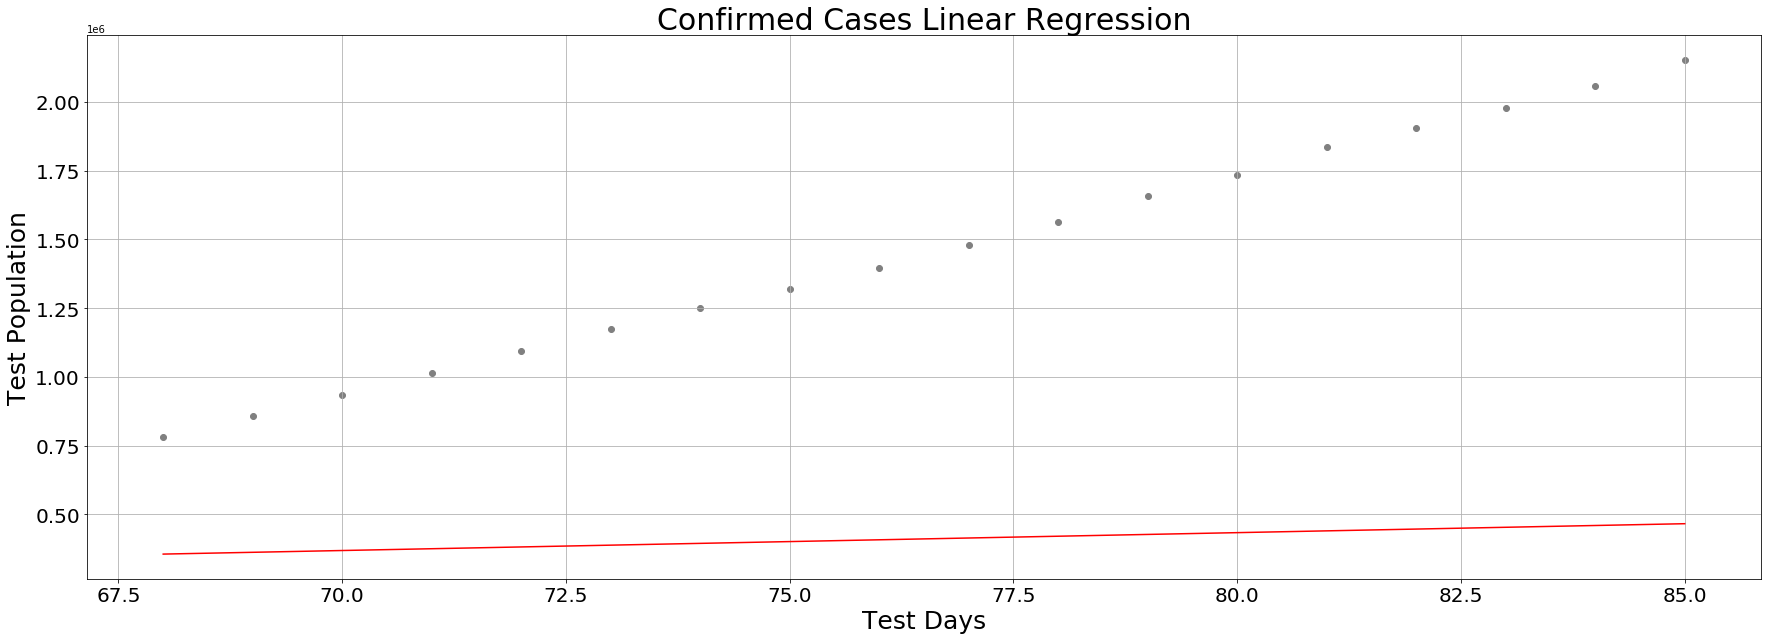

Mean Absolute Error: 1043546.319017657
Mean Squared Error: 1236723654765.8674
Root Mean Squared Error: 1112080.777086749


In [15]:
#Linear Regression
covid_analyzer.linearReg(title = 'Confirmed Cases Linear Regression')

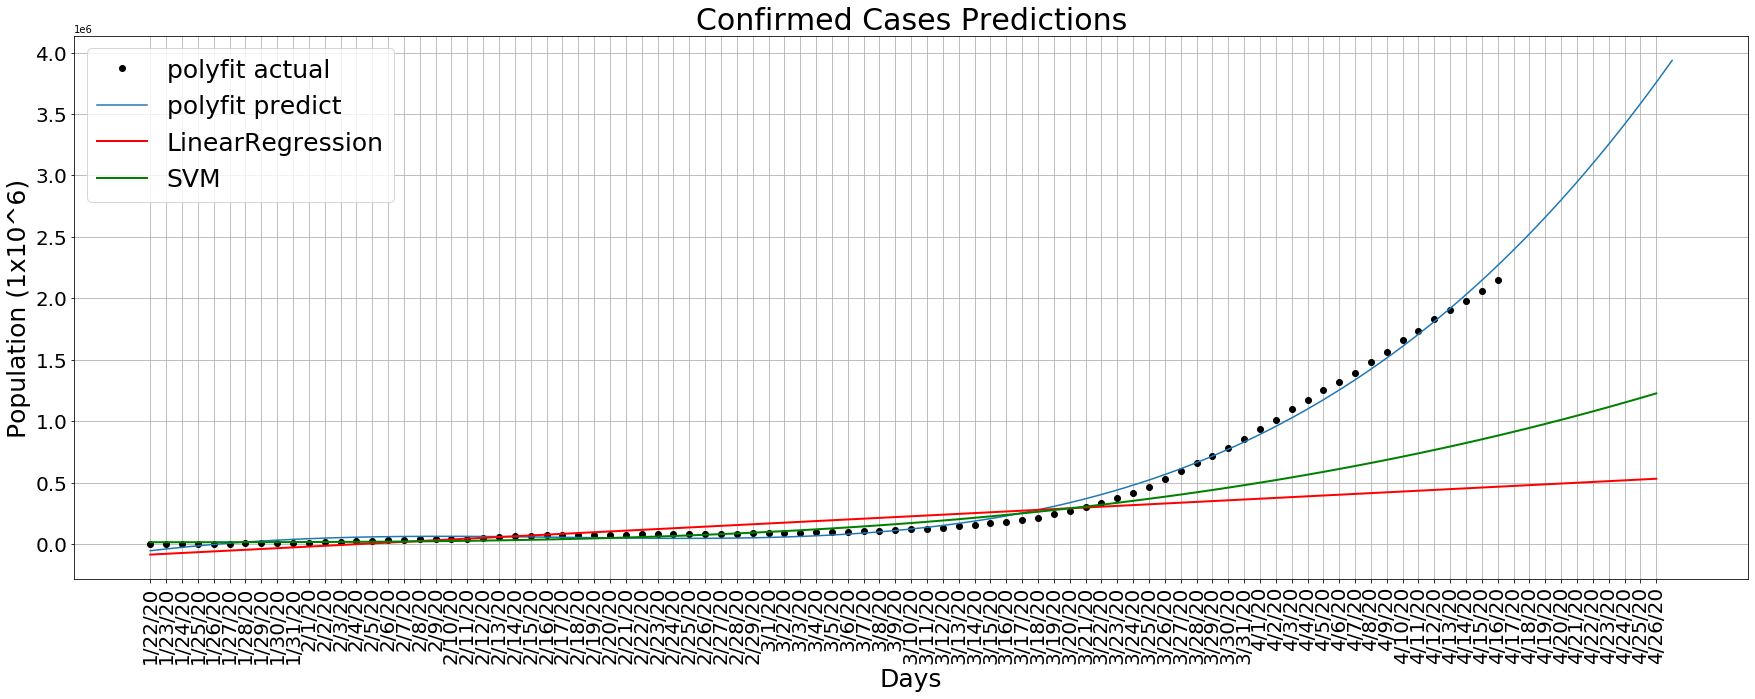

In [72]:
#Polyfit
covid_analyzer.polyfit(title = 'Confirmed Cases Predictions')

### Recovered

In [73]:
y_recovered = total_per_day(dates, recovered)

In [74]:
covid_analyzer = CovidAnalyzer()
covid_analyzer.set_data(X, y_recovered)
covid_analyzer.prepare()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search Params:  {'shrinking': True, 'kernel': 'poly', 'gamma': 0.05, 'epsilon': 0.01, 'C': 0.01}
     Actual      Predicted
0    782389  394820.655296
1    857487  411404.137270
2    932605  428475.334064
3   1013466  446041.314011
4   1095917  464109.145440
5   1176060  482685.896682
6   1249754  501778.636069
7   1321481  521394.431930
8   1395194  541540.352597
9   1480202  562223.466400
10  1563935  583450.841670
11  1657526  605229.546739
12  1735650  627566.649935
13  1834721  650469.219591
14  1904838  673944.324037
15  1976191  697999.031604
16  2056054  722640.410622
17  2152646  747875.529422


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


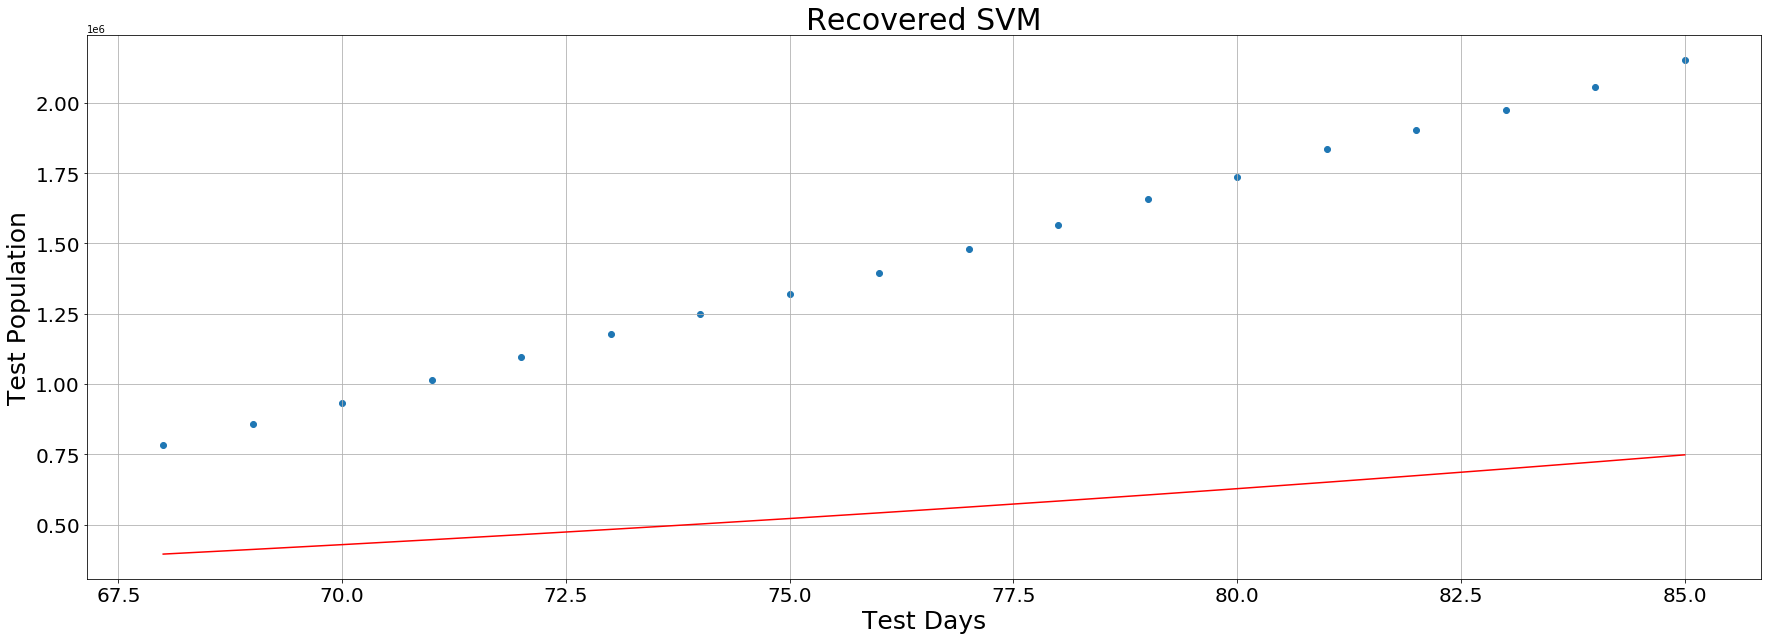

MAE 895692.615367872
MSE 898639115192.7252


In [16]:
#SVM
covid_analyzer.svm(title = 'Recovered SVM')

Y-Intercept:  [-85836.76470588]
Slope:  [[6497.70807726]]
     Actual      Predicted
0    782389  356007.384548
1    857487  362505.092625
2    932605  369002.800702
3   1013466  375500.508780
4   1095917  381998.216857
5   1176060  388495.924934
6   1249754  394993.633011
7   1321481  401491.341089
8   1395194  407989.049166
9   1480202  414486.757243
10  1563935  420984.465320
11  1657526  427482.173398
12  1735650  433979.881475
13  1834721  440477.589552
14  1904838  446975.297629
15  1976191  453473.005707
16  2056054  459970.713784
17  2152646  466468.421861


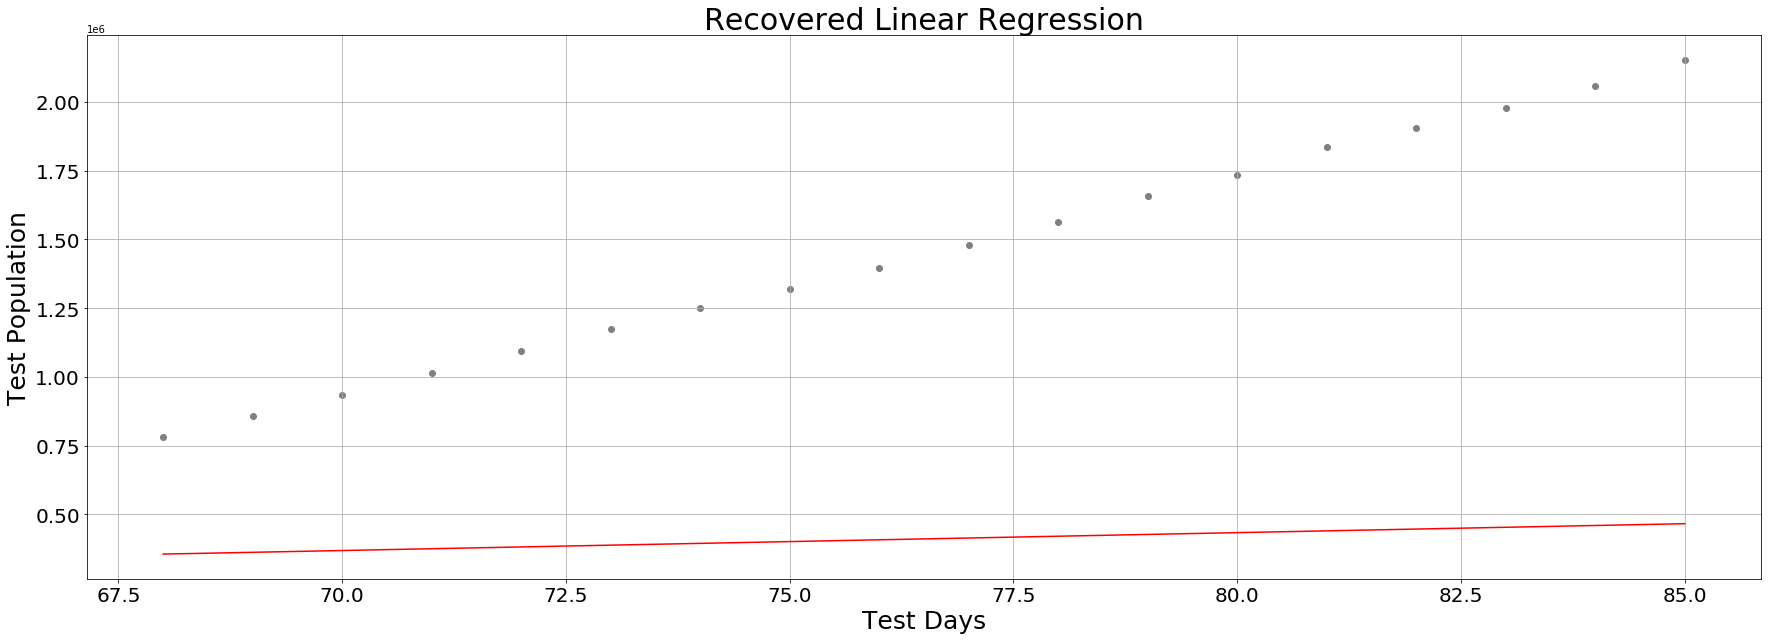

Mean Absolute Error: 1043546.319017657
Mean Squared Error: 1236723654765.8674
Root Mean Squared Error: 1112080.777086749


In [17]:
#Linear Regression
covid_analyzer.linearReg(title = 'Recovered Linear Regression')

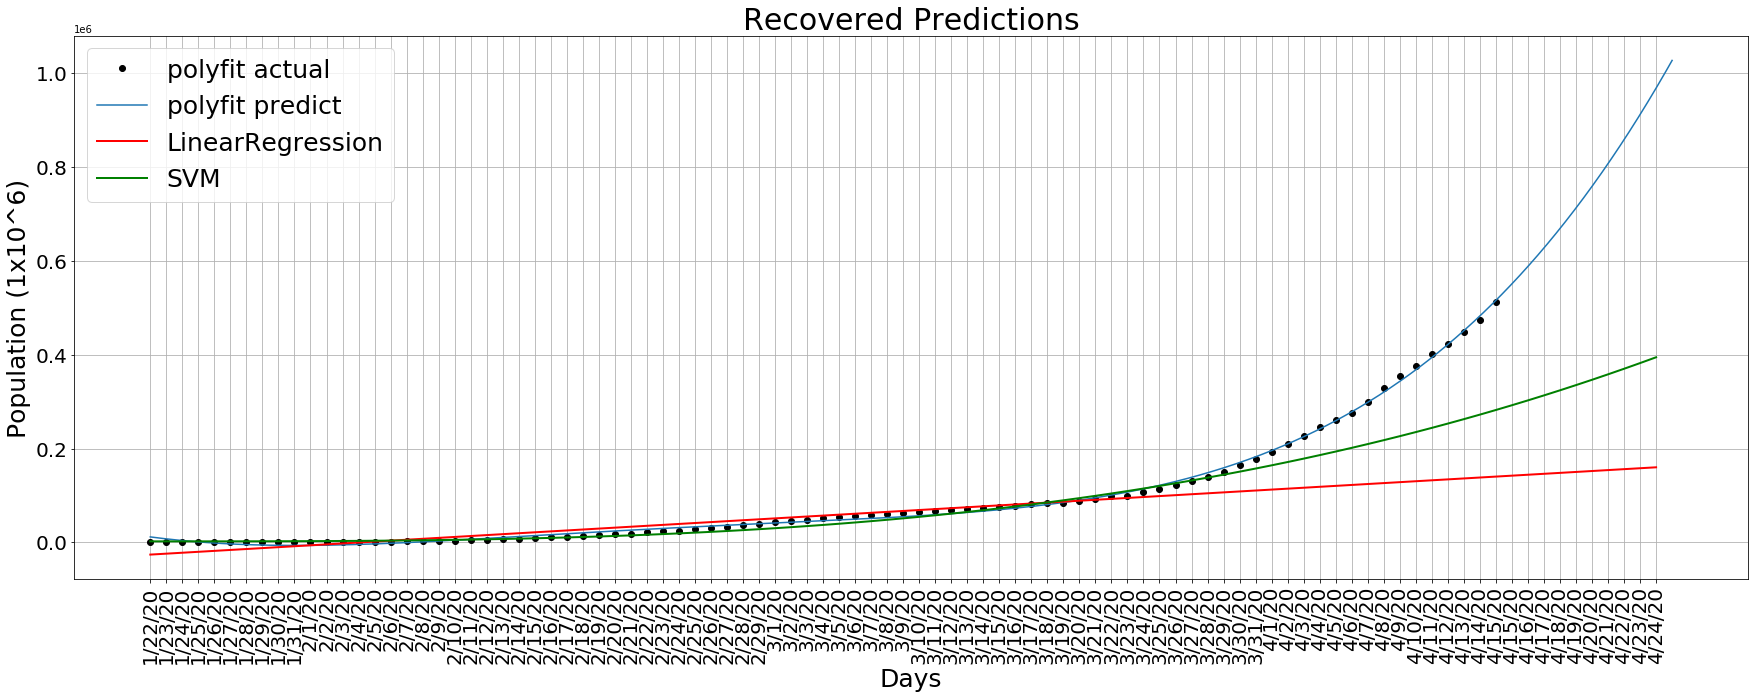

In [22]:
covid_analyzer.polyfit(title = 'Recovered Predictions')

### Mortalities

In [23]:
y_deaths = total_per_day(dates, deaths)

In [24]:
covid_analyzer = CovidAnalyzer()
covid_analyzer.set_data(X, y_deaths)
covid_analyzer.prepare()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.3s finished


Search Params:  {'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 1, 'C': 1}
    Actual     Predicted
0    37582  19425.051632
1    42107  20284.136288
2    47180  21168.486263
3    52983  22078.467830
4    58787  23014.447140
5    64606  23976.790401
6    69374  24965.863582
7    74565  25982.033138
8    81865  27025.665035
9    88338  28097.125423
10   95455  29196.780575
11  102525  30324.996578
12  108503  31482.139767
13  114091  32668.576046
14  119482  33884.671749
15  125984  35130.792965
16  134177  36407.305904


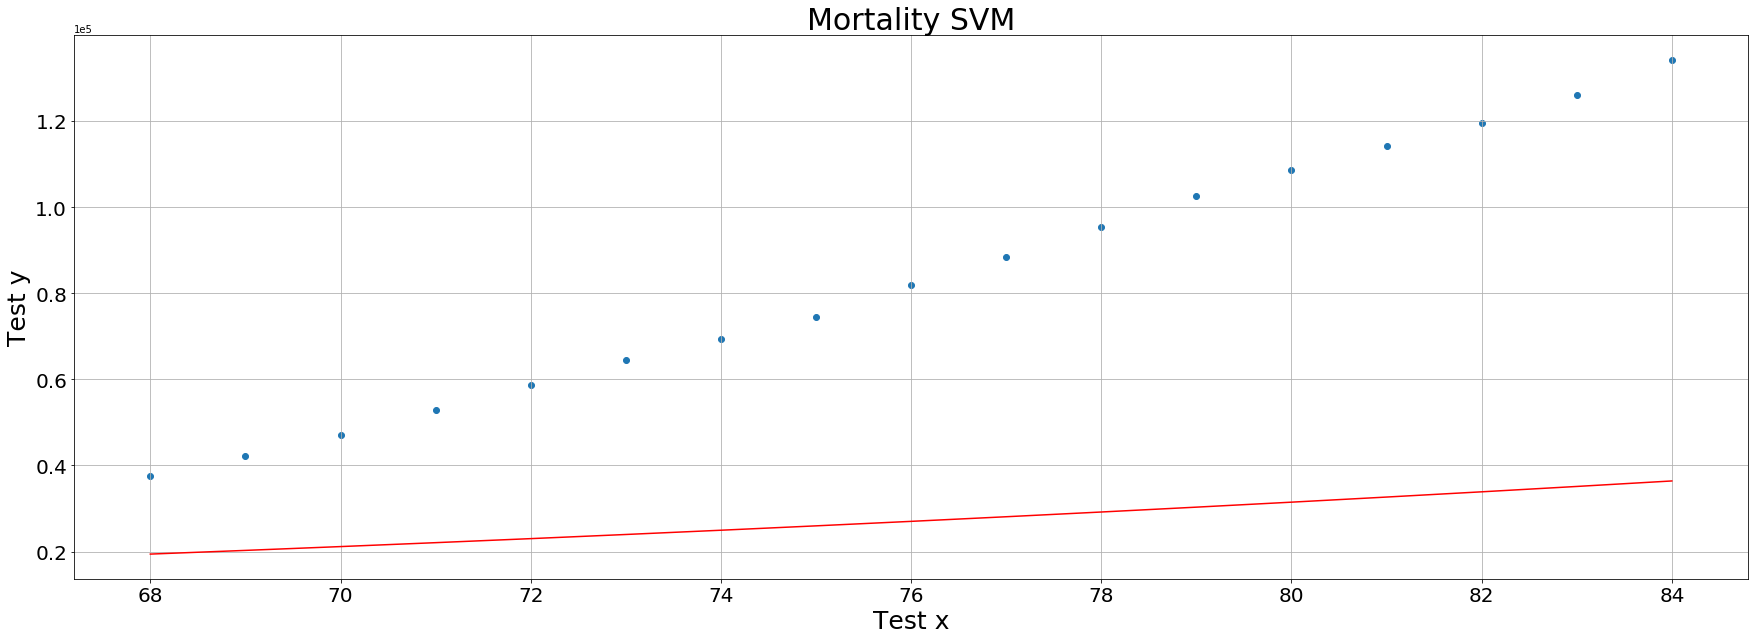

MAE 56028.862922607164
MSE 3743626428.4932394


In [25]:
#SVM
covid_analyzer.svm(title = 'Mortality SVM')

Y-Intercept:  [-4571.18414322]
Slope:  [[291.98793755]]
    Actual     Predicted
0    37582  15283.995610
1    42107  15575.983548
2    47180  15867.971485
3    52983  16159.959423
4    58787  16451.947360
5    64606  16743.935298
6    69374  17035.923235
7    74565  17327.911173
8    81865  17619.899111
9    88338  17911.887048
10   95455  18203.874986
11  102525  18495.862923
12  108503  18787.850861
13  114091  19079.838798
14  119482  19371.826736
15  125984  19663.814673
16  134177  19955.802611


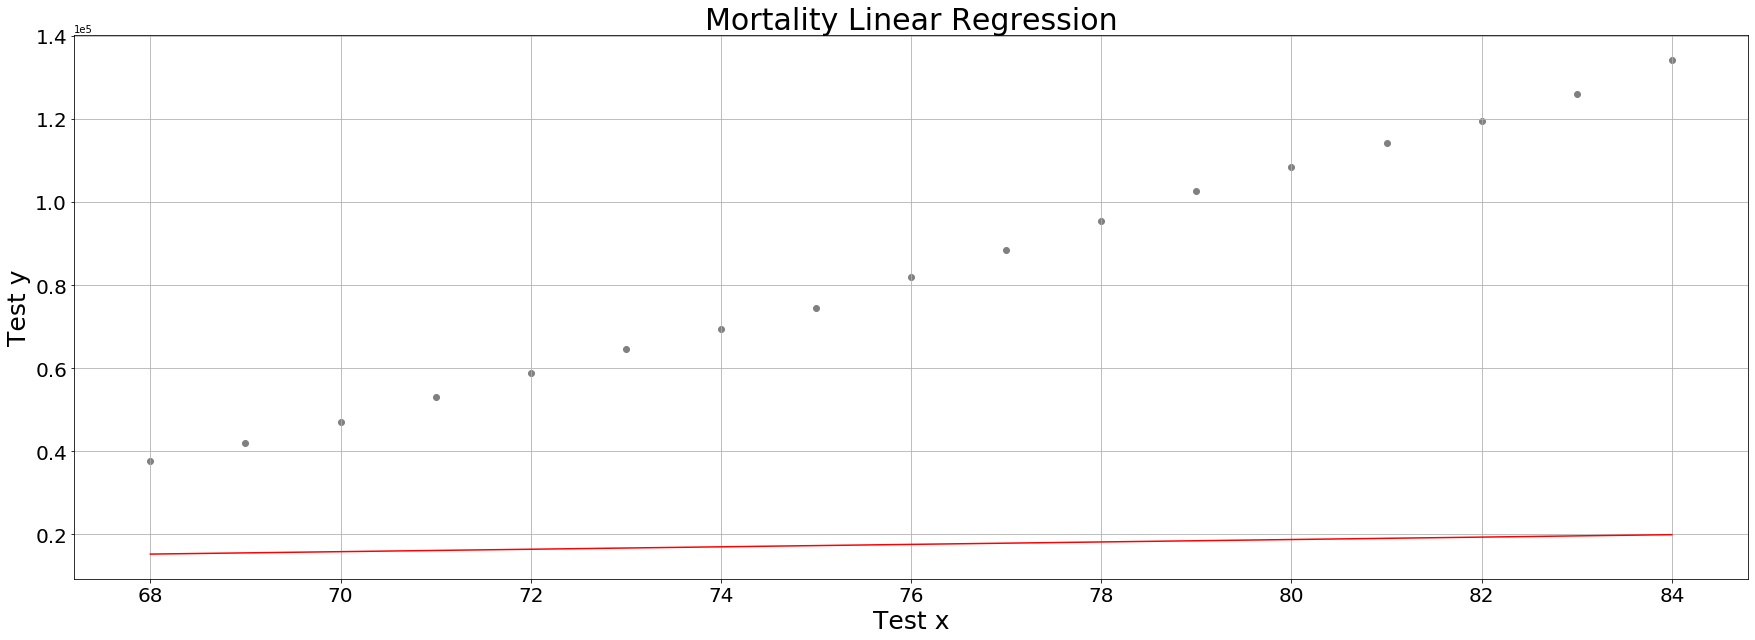

Mean Absolute Error: 65768.57147765011
Mean Squared Error: 5129424097.328195
Root Mean Squared Error: 71619.99788696028


In [26]:
#Linear Regression
covid_analyzer.linearReg(title = 'Mortality Linear Regression')

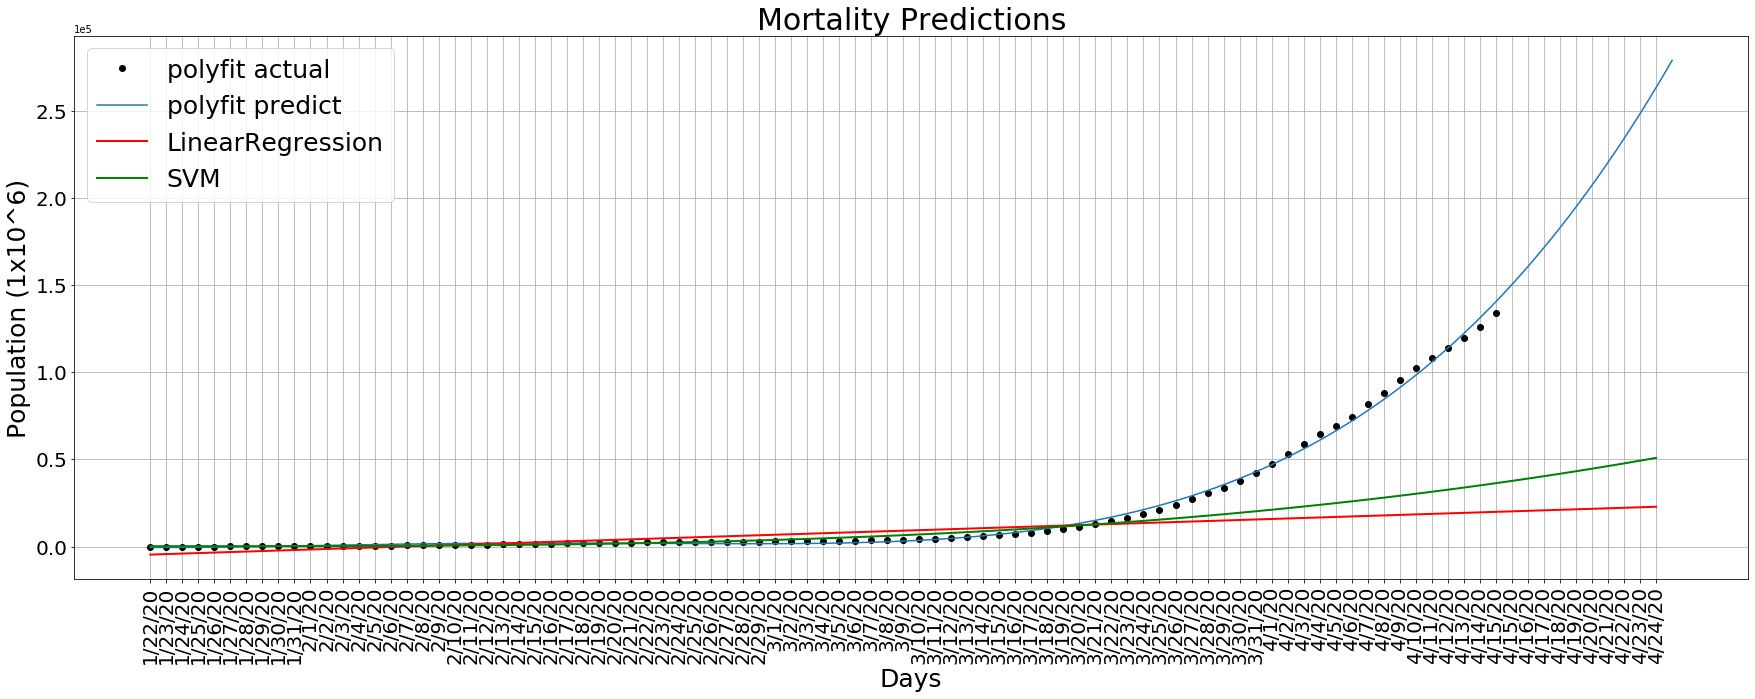

In [27]:
covid_analyzer.polyfit(title = 'Mortality Predictions')

### Conclusions

>The COVID-19 crisis is an important, relevant topic that we felt interested in modeling. We decided to create a class that could take in various modules that are called on to run the modeling techniques. To visualize the data, we plotted the various curves against one another to visualize how well our machine learning algorhythm was modeled against the polyfit function that explicitly matched the dataset. While this project was difficult for various reasons, we felt that the relevancy of this issue was the most applicable for our disease model idea.